Mod - 9-1-4

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

Mod - 9-1-5

In [19]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

import numpy as np
import pandas as pd
import datetime as dt

In [3]:
# creating an engine function to connect to the data base files
engine = create_engine("sqlite:///hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

Module 9-2-1 through 9-2-4

<AxesSubplot:xlabel='date'>

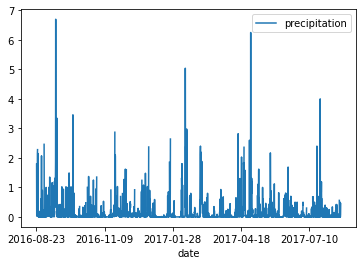

In [34]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp)
#print(results.all())


# Filter data  form the query to retrieve the data only for the previous year
#                                                                                   removed .all() got an error message
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year)
#print(results.all())

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)

#print the newly crated data freme (df)
# used a print command to check the output and then commented it out to keep my final output clean

#print(df)

# change the data frame to a string and remove the index to remove the second date column

# used a print command to check the output and then commented it out to keep my final output clean

#print(df.to_string(index=False))

# Sort the dataframe by date
df = df.sort_index()

# used a print command to check the output and then commented it out to keep my final output clean

#print(df.to_string(index=False))
    
    
# Use Pandas Plotting with Matplotlib to plot the data

df.plot()


Module 9-2-5

In [35]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


Module 9-3-1

In [37]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9,)]

Module 9-3-2

In [39]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

Module 9-3-3

In [40]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

Module 9-3-4

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


NameError: name 'plt' is not defined

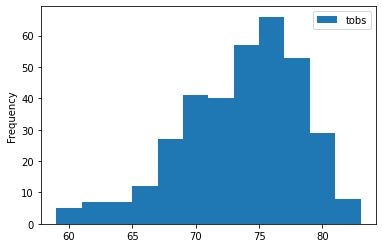

In [47]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()

# used a print command to check the output and then commented it out to keep my final output clean
#print(results)

# results into a data-frame to make it legible & print

df = pd.DataFrame(results, columns=['tobs'])

# used a print command to check the output and then commented it out to keep my final output clean
print (df)

df.plot.hist(bins=12)
#                       The module asked us to add the code below be I get a error message that plt. is not defined.
#plt.tight_layout()


SKILL DRILL - Mod 9-3-4

<AxesSubplot:ylabel='Frequency'>

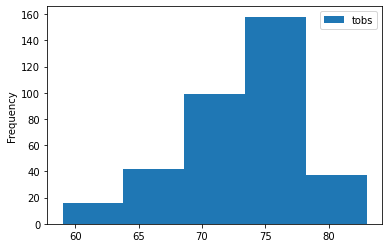

In [49]:
#change the plot to only have 5 bins
df.plot.hist(bins=5)

<AxesSubplot:ylabel='Frequency'>

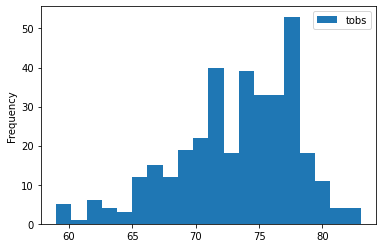

In [50]:
#change the plot to only have 20 bins
df.plot.hist(bins=20)

In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge